In [11]:
import keras
from keras import layers
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [12]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [13]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [16]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3906 - val_loss: 0.1983
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1882 - val_loss: 0.1626
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1580 - val_loss: 0.1433
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1413 - val_loss: 0.1320
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1311 - val_loss: 0.1242
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1238 - val_loss: 0.1185
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1189 - val_loss: 0.1144
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1146 - val_loss: 0.1112
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1117 - val_loss: 0.1089
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1096 - val_loss: 0.1074

In [18]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

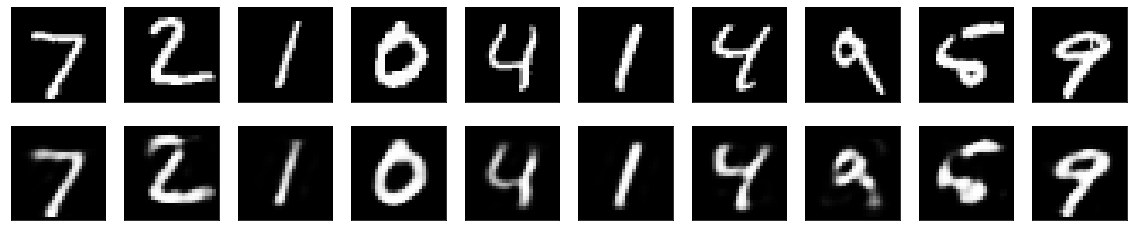

In [19]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [21]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3409 - val_loss: 0.1674
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1591 - val_loss: 0.1376
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1354 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1255 - val_loss: 0.1181
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1179 - val_loss: 0.1122
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1127 - val_loss: 0.1091
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1068
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1072 - val_loss: 0.1043
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1053 - val_loss: 0.1031
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1035 - val_lo

235/235 [==============================] - 1s 4ms/step - loss: 0.0860 - val_loss: 0.0859
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0859 - val_loss: 0.0859
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0860 - val_loss: 0.0857
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0858 - val_loss: 0.0860
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0859 - val_loss: 0.0856
Epoch 86/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0857 - val_loss: 0.0859
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0859 - val_loss: 0.0859
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0855 - val_loss: 0.0856
Epoch 89/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0858 - val_loss: 0.0857
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0855 - val_loss: 

In [27]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

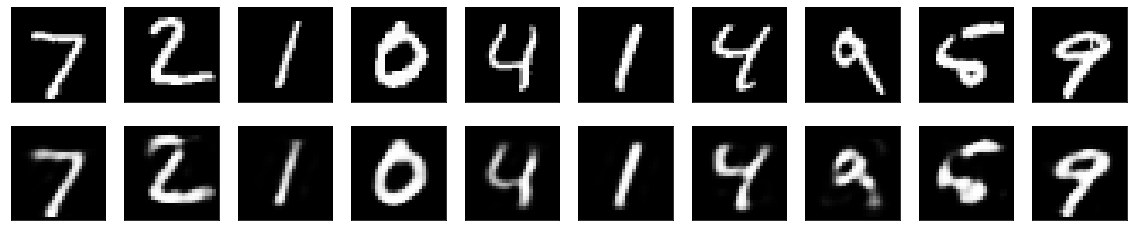

In [24]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()